## Drawdowns 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
portfolio = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0,
                               parse_dates=True, na_values=-99.99)

In [3]:
portfolio.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [4]:
rets = portfolio[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets.head()

,SmallCap,LargeCap
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [5]:
#convert to raw data 
rets = rets/100
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [6]:
rets.plot.line(figsize=(12,8))

In [7]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [8]:
# index not showing up as date. Convert to data 
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [9]:
rets.tail()

,SmallCap,LargeCap
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253
2018-12-01,-0.1531,-0.0890


In [10]:
#Month not showing up as a period. Change to a month period. 
rets.index =rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


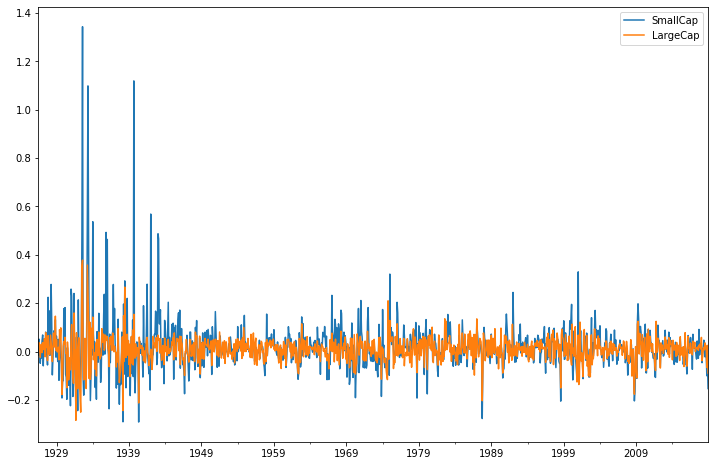

In [11]:
rets.plot.line(figsize=(12,8))

# Compute Drawdowns 

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown -- which is the wealth value as a percentage of the previous peak

In [12]:
# Calculate the wealth index. Use 1000 as the starting amount
wealth_index = 1000*(1 + rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

In [13]:
wealth_index.tail()

2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: LargeCap, dtype: float64

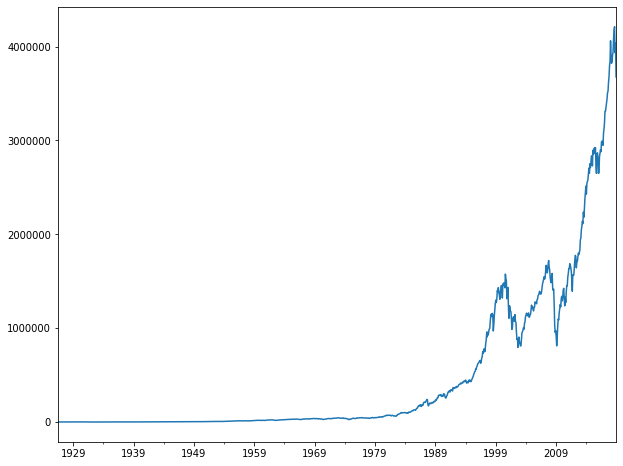

In [14]:
wealth_index.plot.line(figsize=(10,8))

In [15]:
#Compute previous peaks
previous_peaks = wealth_index.cummax()

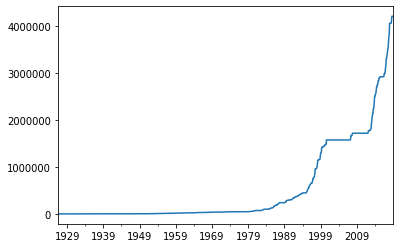

In [16]:
previous_peaks.plot()

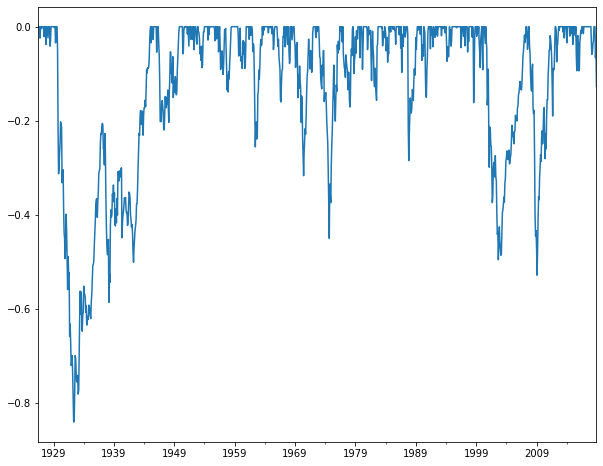

In [17]:
#Compute Drawdown
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot(figsize=(10,8))

In [18]:
drawdown.min()

-0.8400375277943123

In [19]:
# Create Drawdown Function

def Drawdown(return_series: pd.Series):
    
    """
    Takes a time series of asset returns
    Computes and returns a Dataframe that contains:
    the Wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index = 1000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [20]:
#check to see if functioning
Drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [21]:
#Look at two columns 
Drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


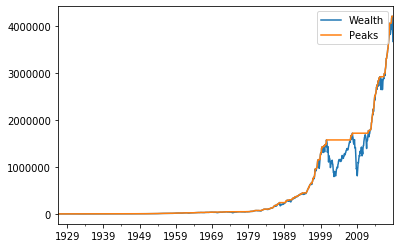

In [22]:
Drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot()

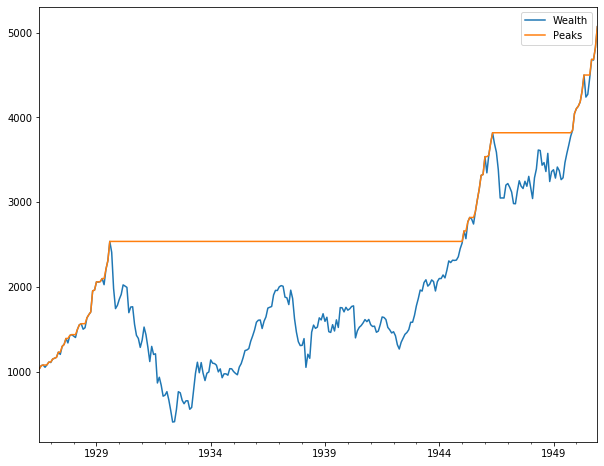

In [23]:
# Look at up to 1950
Drawdown(rets[:'1950']['LargeCap'])[['Wealth', 'Peaks']].plot(figsize=(10,8))

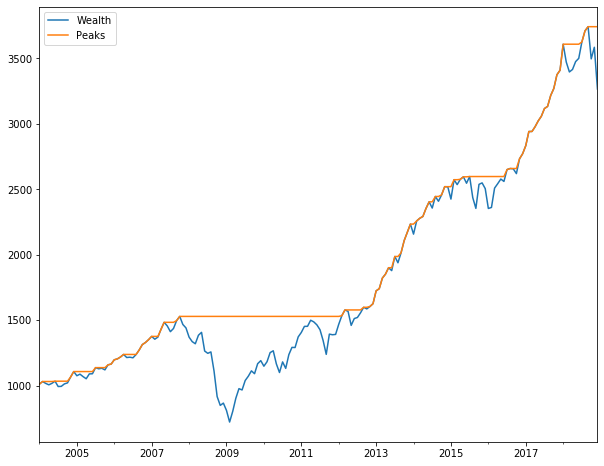

In [24]:
#Look at 2004 to 2018
Drawdown(rets['2004':]['LargeCap'])[['Wealth', 'Peaks']].plot(figsize=(10,8))

In [25]:
Drawdown(rets['LargeCap'])['Drawdown'].min()

-0.8400375277943123

In [26]:
Drawdown(rets['SmallCap'])['Drawdown'].min()

-0.8330007793945303

In [27]:
Drawdown(rets['LargeCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [28]:
Drawdown(rets['SmallCap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [29]:
Drawdown(rets['1940':]['LargeCap'])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [30]:
Drawdown(rets['1940':]['SmallCap'])['Drawdown'].idxmin()

Period('1974-12', 'M')

In [31]:
Drawdown(rets['1975':]['SmallCap'])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [32]:
Drawdown(rets['1975':]['LargeCap'])['Drawdown'].idxmin()

Period('2009-02', 'M')